In [2]:
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()



In [3]:
from tensorflow.keras import models
from tensorflow.keras import layers

# Because you’ll need to instantiate the same model multiple times, you use a function to construct it.
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation="relu", input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(1))
    
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    
    return model

In [4]:
import numpy as np 

k = 4

num_val_samples = len(train_data) // k
num_epochs = 100 
all_scores = []


In [5]:
for i in range(k):
    print("processing fold #", i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepares the training data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)

    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Builds the Keras model
    model = build_model()

    # Trains the model
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1)

    # Evaluates the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets)
    all_scores.append(val_mae)

 loss: 17.6531 - mae: 2.9779
Epoch 100/100
4/4 [==============================] - 0s 1ms/step - loss: 18.0975 - mae: 3.1567
processing fold # 2
Epoch 1/100
303/303 [==============================] - 0s 1ms/step - loss: 129.7504 - mae: 8.6356
Epoch 2/100
303/303 [==============================] - 0s 1ms/step - loss: 99.8288 - mae: 7.3920
Epoch 3/100
303/303 [==============================] - 0s 1ms/step - loss: 91.3513 - mae: 7.1150
Epoch 4/100
303/303 [==============================] - 0s 1ms/step - loss: 79.1995 - mae: 6.5325
Epoch 5/100
303/303 [==============================] - 0s 1ms/step - loss: 75.8988 - mae: 6.3283
Epoch 6/100
303/303 [==============================] - 0s 1ms/step - loss: 65.0768 - mae: 6.0140
Epoch 7/100
303/303 [==============================] - 0s 1ms/step - loss: 59.7936 - mae: 5.6601
Epoch 8/100
303/303 [==============================] - 0s 1ms/step - loss: 59.9825 - mae: 5.5870
Epoch 9/100
303/303 [==============================] - 0s 1ms/step - loss: 56.8

In [6]:
np.mean(all_scores)

3.3331729769706726

In [7]:
all_scores

[3.7355716228485107, 3.156696319580078, 3.159641742706299, 3.2807822227478027]

In [8]:
num_epochs = 200 

all_mae_histories = []

for i in range(k):
    print("processing fold #", i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)

    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()

    history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets), epochs=num_epochs, batch_size=1)

    mae_history = history.history["val_mean_absolute_error"]

    all_mae_histories.append(mae_history)

3277 - val_loss: 14.9581 - val_mae: 2.8008
Epoch 55/200
303/303 [==============================] - 0s 2ms/step - loss: 21.8366 - mae: 3.4117 - val_loss: 15.0420 - val_mae: 2.8968
Epoch 56/200
303/303 [==============================] - 0s 2ms/step - loss: 21.7043 - mae: 3.1928 - val_loss: 26.3062 - val_mae: 3.9678
Epoch 57/200
303/303 [==============================] - 0s 1ms/step - loss: 21.0760 - mae: 3.3057 - val_loss: 16.2431 - val_mae: 3.0797
Epoch 58/200
303/303 [==============================] - 0s 1ms/step - loss: 19.4079 - mae: 3.2485 - val_loss: 16.5517 - val_mae: 2.7655
Epoch 59/200
303/303 [==============================] - 0s 1ms/step - loss: 21.5303 - mae: 3.2418 - val_loss: 33.5303 - val_mae: 4.4649
Epoch 60/200
303/303 [==============================] - 0s 1ms/step - loss: 20.8027 - mae: 3.2137 - val_loss: 23.9155 - val_mae: 3.6407
Epoch 61/200
303/303 [==============================] - 0s 2ms/step - loss: 20.7702 - mae: 3.2549 - val_loss: 16.6602 - val_mae: 2.8442
Epoch

KeyError: 'val_mean_absolute_error'

In [9]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

NameError: name 'average_mae_history' is not defined

In [11]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [12]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

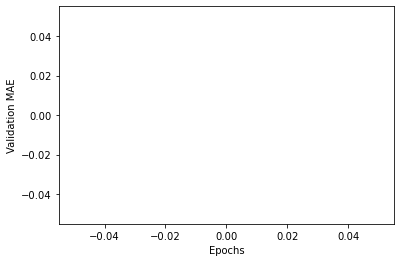

In [13]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [14]:
model = build_model()
model.fit(train_data, train_targets,
epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
test_mae_score

4/4 [==============================] - 0s 4ms/step - loss: 27.9594 - mae: 3.6336


3.6335697174072266